In [21]:
#Neural Network Classification with Pytorch
from sklearn.datasets import make_circles
samples = 1000
x,y = make_circles(n_samples=samples, noise=0.03, random_state=42)#features and labels
len(x), len(y)

(1000, 1000)

In [22]:
x,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]], shape=(1000, 2)),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1

In [23]:
import torch
from torch import nn
import pandas as pd
df=pd.DataFrame({"x1":x[:,0], "x2":x[:,1], "label":y})
df

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


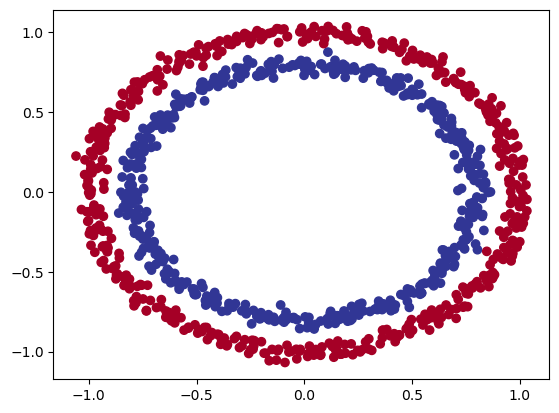

In [24]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0], y=x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [25]:
x.shape,y.shape

((1000, 2), (1000,))

In [26]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [27]:
x= torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
x,y#now u see the data has been changed to tensor

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [29]:
#model creation
class circlemodel(nn.Module):
    def __init__(self):
        super().__init__()
        #here we need to create 2 linear layers to handle the shapes of our data
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5,out_features=1)
    def forward(self, x):
        return self.layer2(self.layer1(x))
model = circlemodel()
model

circlemodel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [30]:
model1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)
model1# instead of doing all class circle model and using nn module & forward pass we can simply use nn.sequential and assign it to our model1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [31]:
print(model.state_dict())
print(model1.state_dict())

OrderedDict({'layer1.weight': tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]]), 'layer1.bias': tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410]), 'layer2.weight': tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]]), 'layer2.bias': tensor([-0.2060])})
OrderedDict({'0.weight': tensor([[-0.0829, -0.2872],
        [ 0.4691, -0.5582],
        [-0.3260, -0.1997],
        [-0.4252,  0.0667],
        [-0.6984,  0.6386]]), '0.bias': tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370]), '1.weight': tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]]), '1.bias': tensor([-0.1213])})


In [32]:
#prediction
with torch.inference_mode(): 
    predictions = model(x_test)
print(predictions[:10])
print(y[:10])

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]])
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.])


In [33]:
#set loss function and optimizer
loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [34]:
#train model
with torch.inference_mode():
    logits = model(x_test)
logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944],
        [-0.1256],
        [-0.1183],
        [-0.0871],
        [-0.1990],
        [-0.1960],
        [-0.1177],
        [-0.0954],
        [-0.1381],
        [-0.1427],
        [-0.1568],
        [-0.0955],
        [-0.1151],
        [-0.1519],
        [-0.1497],
        [-0.0818],
        [-0.0904],
        [-0.2042],
        [-0.1365],
        [-0.1991],
        [-0.1948],
        [-0.0960],
        [-0.0808],
        [-0.1195],
        [-0.1835],
        [-0.1235],
        [-0.1012],
        [-0.1149],
        [-0.1977],
        [-0.1909],
        [-0.1980],
        [-0.1553],
        [-0.1857],
        [-0.0966],
        [-0.1733],
        [-0.1167],
        [-0.0981],
        [-0.1613],
        [-0.0945],
        [-0.1067],
        [-0.1559],
        [-0.1113],
        [-0.1144],
        [-0.

In [35]:
#use sigmoid activation function to convert logits to probabilities()
probabilities = torch.sigmoid(logits)
probabilities

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584],
        [0.4630],
        [0.4794],
        [0.4764],
        [0.4522],
        [0.4764],
        [0.4687],
        [0.4705],
        [0.4782],
        [0.4504],
        [0.4511],
        [0.4706],
        [0.4762],
        [0.4655],
        [0.4644],
        [0.4609],
        [0.4761],
        [0.4713],
        [0.4621],
        [0.4627],
        [0.4796],
        [0.4774],
        [0.4491],
        [0.4659],
        [0.4504],
        [0.4514],
        [0.4760],
        [0.4798],
        [0.4702],
        [0.4543],
        [0.4692],
        [0.4747],
        [0.4713],
        [0.4507],
        [0.4524],
        [0.4507],
        [0.4613],
        [0.4537],
        [0.4759],
        [0.4568],
        [0.4709],
        [0.4755],
        [0.4598],
        [0.4764],
        [0.4733],
        [0.4611],
        [0.4722],
        [0.4714],
        [0.4680],
        [0.4548],
        [0.4747],
        [0

In [36]:
#find the predicted labels
pred_prob = torch.round(probabilities)

pred_labels = torch.round(torch.sigmoid(model(x_test)))

#check the equality
print(torch.eq(pred_prob.squeeze(),pred_labels.squeeze()))  

pred_prob.squeeze()


tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
#built train and test loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)#for reproducibility 
epochs = 100

for epoch in range(epochs):
       model.train()
       y_logits = model(x_train).squeeze() 
       y_pred = torch.round(torch.sigmoid(y_logits)) #convert logits to probabilities and then round them to get predictions
       train_loss = loss(y_logits, y_train) #calculate loss
       optimizer.zero_grad() #zero the gradients
       train_loss.backward() #backpropagation
       optimizer.step() #update the weights
       
      ##testing
       model.eval() #set the model to evaluation mode
       with torch.inference_mode():
          test_logits = model(x_test).squeeze() #get the logits for the test set
          test_pred = torch.round(torch.sigmoid(test_logits)) #convert logits to probabilities and then round them to get predictions
          test_loss = loss(test_logits, y_test) #calculate loss for the test set
       if epoch % 10 == 0:
           print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f} | Train Accuracy: {torch.eq(y_pred, y_train).sum()/len(y_train):.2f}% | Test Accuracy: {torch.eq(test_pred, y_test).sum()/len(y_test):.2f}%")


Epoch: 0 | Train Loss: 0.69569 | Test Loss: 0.69721 | Train Accuracy: 0.50% | Test Accuracy: 0.50%
Epoch: 10 | Train Loss: 0.69403 | Test Loss: 0.69615 | Train Accuracy: 0.50% | Test Accuracy: 0.50%
Epoch: 20 | Train Loss: 0.69343 | Test Loss: 0.69585 | Train Accuracy: 0.46% | Test Accuracy: 0.49%
Epoch: 30 | Train Loss: 0.69321 | Test Loss: 0.69577 | Train Accuracy: 0.49% | Test Accuracy: 0.47%
Epoch: 40 | Train Loss: 0.69312 | Test Loss: 0.69573 | Train Accuracy: 0.50% | Test Accuracy: 0.47%
Epoch: 50 | Train Loss: 0.69308 | Test Loss: 0.69569 | Train Accuracy: 0.50% | Test Accuracy: 0.47%
Epoch: 60 | Train Loss: 0.69306 | Test Loss: 0.69564 | Train Accuracy: 0.50% | Test Accuracy: 0.47%
Epoch: 70 | Train Loss: 0.69305 | Test Loss: 0.69559 | Train Accuracy: 0.50% | Test Accuracy: 0.47%
Epoch: 80 | Train Loss: 0.69304 | Test Loss: 0.69553 | Train Accuracy: 0.51% | Test Accuracy: 0.47%
Epoch: 90 | Train Loss: 0.69303 | Test Loss: 0.69547 | Train Accuracy: 0.50% | Test Accuracy: 0.47%


In [38]:
#make predictions and evaluate the model
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    print("Downloading helper_functions.py...")
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    response = requests.get(url)
    with open("helper_functions.py", "wb") as file:
        file.write(response.content)
from helper_functions import plot_decision_boundary, plot_predictions


helper_functions.py already exists, skipping download.


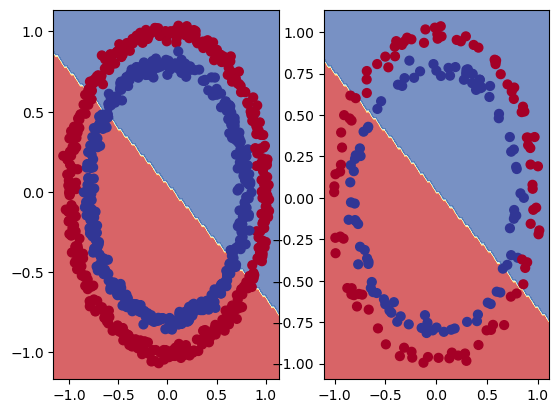

In [39]:
#plot decision boundary
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plot_decision_boundary(model=model, X=x_train, y=y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model=model, X=x_test, y=y_test)